In [83]:
import pandas as pd
import numpy as np

data = pd.read_excel('BITCOIN.xls')
bit = data['Value'].tolist()

def train_bitcoin(n,t,rate):
#  n: price of bitcoin when we bought in it
#  t: price of whole things we have(include money and bitcoin)
#  m: the number of bitcoin we have in the first day

    m = ((t*rate)/n)//0.01/100
    b =[]
    pic = []

    for i in range(29,len(bit)-2):
        if m!= 0 and bit[i]>bit[i+1] and bit[i]>bit[i+2]: 
            #if we hold bitcoin and know price decrease in the next two days
            t = (bit[i]*m*rate)//0.01/100    #money we have now
            n = 0
            m = 0
            b.append(m)
        elif m == 0 and bit[i]<(bit[i+2]*rate): 
            #if we don't hold bitcoin and we know price increase in the next two days
            n = bit[i]
            m = ((t*rate)/n)//0.01/100
            b.append(m)
            pic.append(m)
        else:
            continue

    return t,pic
a,b=train_bitcoin(614,1000,0.98)
print(b)

[1.56, 1.49, 1.52, 1.46, 1.44, 1.35, 1.3, 1.26, 1.73, 1.67, 1.62, 1.6, 1.54, 1.59, 1.53, 1.5, 1.6, 1.53, 1.94, 2.24, 2.15, 2.08, 2.01, 2.02, 1.97, 1.98, 2.07, 2.15, 2.41, 2.52, 2.5, 3.24, 3.18, 3.36, 3.43, 3.39, 3.3, 3.39, 3.26, 3.13, 3.28, 4.41, 4.25, 4.46, 4.31, 4.14, 4.13, 4.12, 4.17, 4.0, 4.99, 4.81, 5.23, 5.16, 7.01, 7.94, 9.93, 11.69, 13.25, 21.44, 23.61, 29.85, 32.21, 39.89, 43.08, 43.34, 44.11, 45.4, 44.04, 50.32, 55.65, 64.69, 63.88, 70.19, 68.13, 70.8, 70.66, 90.87, 87.38, 85.07, 94.62, 93.45, 93.73, 96.34, 155.74, 186.29, 194.44, 197.44, 203.52, 197.66, 216.92, 223.68, 218.78, 212.36, 226.28, 220.97, 216.53, 208.02, 210.65, 211.84, 206.55, 221.13, 228.18, 232.32, 250.42, 251.76, 248.48, 277.21, 311.42, 327.19, 420.86, 457.94, 526.71, 513.02, 531.02, 523.16, 542.18, 547.52, 680.18, 695.76, 721.44, 763.5, 798.97, 1003.91, 1039.83, 1095.57, 1065.95, 1072.06, 1075.37, 1034.13, 1006.88, 1034.76, 1030.68, 1032.78, 1041.39, 1146.75, 1121.27, 2041.25, 2187.67, 2113.45, 2194.29, 2258

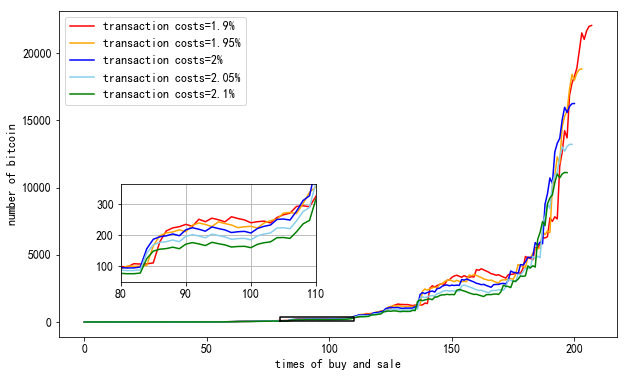

1140640530.48 972662445.71 839585033.24 682041213.58 573473524.39


In [137]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import ConnectionPatch

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
a,b = train_bitcoin(614,1000,0.98)
a1,b1 = train_bitcoin(614,1000,0.9805)
a2,b2 = train_bitcoin(614,1000,0.981)
a3,b3 = train_bitcoin(614,1000,0.9795)
a4,b4 = train_bitcoin(614,1000,0.979)


plt.plot(b2,color="red",label="transaction costs=1.9%")
plt.plot(b1,color="orange",label="transaction costs=1.95%")
plt.plot(b,color="blue",label="transaction costs=2%")
plt.plot(b3,color="skyblue",label="transaction costs=2.05%")
plt.plot(b4,color="green",label="transaction costs=2.1%")
plt.xlabel('times of buy and sale')
plt.ylabel('number of bitcoin')
plt.legend()


axins = inset_axes(ax, width="35%", height="30%", loc='lower left',
                   bbox_to_anchor=(0.1, 0.15, 1, 1), 
                   bbox_transform=ax.transAxes)

axins.plot(b2,color="red")
axins.plot(b1,color="orange")
axins.plot(b,color="blue")
axins.plot(b3,color="skyblue")
axins.plot(b4,color="green")

zone_left = 80
zone_right = 110
x_axis_data = range(len(b))
x_ratio = 0  # extend rate of X range
y_ratio = 0.1  # extend rate of Y range

# range of X
xlim0 = x_axis_data[zone_left]-(x_axis_data[zone_right]-x_axis_data[zone_left])*x_ratio
xlim1 = x_axis_data[zone_right]+(x_axis_data[zone_right]-x_axis_data[zone_left])*x_ratio

# range of Y
y = np.hstack((b2[zone_left:zone_right], b1[zone_left:zone_right],
               b[zone_left:zone_right],b3[zone_left:zone_right],
               b4[zone_left:zone_right]))
ylim0 = np.min(y)-(np.max(y)-np.min(y))*y_ratio
ylim1 = np.max(y)+(np.max(y)-np.min(y))*y_ratio

# range of subplot
axins.set_xlim(xlim0, xlim1)
axins.set_ylim(ylim0, ylim1)

tx0 = xlim0
tx1 = xlim1
ty0 = ylim0
ty1 = ylim1
sx = [tx0,tx1,tx1,tx0,tx0]
sy = [ty0,ty0,ty1,ty1,ty0]
ax.plot(sx,sy,"black")


plt.grid()
plt.savefig('transcationCostBitcoin.png')
plt.show()
print(a2,a1,a,a3,a4)

In [138]:
import pandas as pd
import numpy as np

data = pd.read_excel('GOLD.xls')
bit = data['USD'].tolist()

def train_gold(n,t,rate):
#  n: price of gold when we bought in it
#  t: price of whole things we have(include money and gold)
#  m: the number of gold we have in the first day

    m = (t*rate)/n
    b =[]
    pic = []

    for i in range(32,len(bit)-2):
        if m!= 0 and bit[i]>bit[i+1] and bit[i]>bit[i+2]: 
            #if we hold bitcoin and know price decrease in the next two days
            t = (bit[i]*m*rate)//0.01/100    #money we have now
            n = 0
            m = 0
            b.append(m)
        elif m == 0 and bit[i]<(bit[i+2]*rate): 
            #if we don't hold bitcoin and we know price increase in the next two days
            n = bit[i]
            m = (t*rate)/n
            b.append(m)
            pic.append(m)
        else:
            continue

    return t,pic
a,b=train_gold(1265.55,1000,0.99)

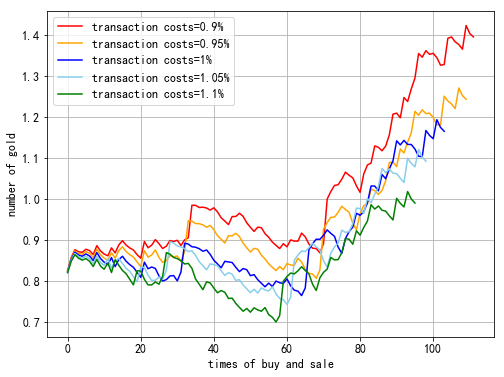

2510.62 2236.31 2094.85 1962.66 1778.49


In [139]:
plt.figure(figsize=(8,6))
a,b = train_gold(1265.55,1000,0.99)
a1,b1 = train_gold(1265.55,1000,0.9905)
a2,b2 = train_gold(1265.55,1000,0.991)
a3,b3 = train_gold(1265.55,1000,0.9895)
a4,b4 = train_gold(1265.55,1000,0.989)
plt.plot(b2,color="red",label="transaction costs=0.9%")
plt.plot(b1,color="orange",label="transaction costs=0.95%")
plt.plot(b,color="blue",label="transaction costs=1%")
plt.plot(b3,color="skyblue",label="transaction costs=1.05%")
plt.plot(b4,color="green",label="transaction costs=1.1%")
plt.xlabel('times of buy and sale')
plt.ylabel('number of gold')

plt.legend()
plt.grid()
plt.savefig('transcationCostGold.png')
plt.show()
print(a2,a1,a,a3,a4)